## Загрузим нужные библиотеки

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import numpy as np

%matplotlib inline

In [25]:
IN_DIR = r'/kaggle/input/innopolisagro2//'

In [26]:
PROC_DIR = r'/kaggle/input/innopolis-agro-proc//'

In [27]:
OUT_DIR = r'/kaggle/working//'

In [28]:
ROLL_TS_DIR = r'/kaggle/input/innopolis-roll-mean-full-ts//'

In [29]:
SUM_DIR = r'/kaggle/input/inno-sum//'

In [30]:
#df = pd.read_csv("/content/train.csv")
df = pd.read_csv(IN_DIR + "train_dataset_train.csv")

In [31]:
df_test = pd.read_csv(IN_DIR + "test_dataset_test.csv")

In [12]:
df_test

,id,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,...,nd_mean_2021-05-19,nd_mean_2021-05-20,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24
0,611,26,0.196691,0.000000,0.259303,0.052522,0.133353,0.000000,0.058353,0.273228,...,0.030786,0.159111,0.127732,0.188092,0.000000,0.200005,0.714292,0.084197,0.157733,0.197326
1,6417,98,0.091192,0.000000,0.125823,0.000000,0.027636,0.433244,0.344155,0.461029,...,0.064743,0.000000,0.039850,0.067910,0.084682,0.025694,0.000000,0.108945,0.141947,0.000000
2,3352,21,0.000000,0.033368,0.285057,0.028275,0.089219,0.080082,0.220537,0.154620,...,0.129930,0.230840,0.034613,0.044020,0.762353,0.167975,0.037838,0.158279,0.073814,0.185710
3,4224,18,0.111243,0.201012,0.000000,0.000000,0.107940,0.000000,0.213204,0.031273,...,0.076965,0.045298,0.000000,0.114008,0.059159,0.058423,0.108990,0.237742,0.000000,0.000000
4,3102,53,0.000000,0.234954,0.000000,0.305964,0.268629,0.305554,0.131192,0.009491,...,0.066117,0.089418,0.024093,0.209458,0.033658,0.000000,0.048622,0.121296,0.010354,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,1743,18,0.000000,0.017866,0.212560,0.231169,0.012535,0.000000,0.103303,0.014683,...,0.403720,0.070515,0.713042,0.018102,0.059161,0.804364,0.077803,0.112885,0.209859,0.269576
2067,3968,56,0.010670,0.105135,0.170843,0.227927,0.000000,0.000000,0.000000,0.258106,...,0.642354,0.526469,0.173497,0.109647,0.744611,0.554205,0.572680,0.511447,0.101374,0.119901
2068,3809,92,0.131978,0.058492,0.607262,0.389112,0.061173,0.185756,0.000000,0.545505,...,0.203868,0.031249,0.000000,0.000000,0.055619,0.051682,0.008488,0.076760,0.038590,0.086436
2069,5485,53,0.044726,0.093328,0.188758,0.290000,0.178694,0.286592,0.041403,0.241813,...,0.000000,0.000000,0.000000,0.053296,0.200393,0.000000,0.040434,0.037837,0.000000,0.165996


## Рассмотрим датасет по ближе

In [13]:
print(df.isna().sum().sum())
print(df_test.isna().sum().sum())

0
0


In [14]:
df.head(3)

,id,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,...,nd_mean_2021-05-20,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24,crop
0,3536,20,0.072846,0.261778,0.062981,0.104442,0.021096,0.052202,0.158723,0.000000,...,0.108999,0.118854,0.000000,0.000000,0.026784,0.126832,0.614770,0.008857,0.081498,3
1,3739,45,0.332928,0.287182,0.097138,0.152467,0.075484,0.000000,0.140326,0.163340,...,0.134469,0.208268,0.000000,0.000000,0.111148,0.174914,0.179612,0.113071,0.046997,4
2,1294,28,0.013679,0.007055,0.120804,0.037839,0.259125,0.000000,0.037446,0.506516,...,0.084467,0.000000,0.210496,0.130467,0.155225,0.090607,0.054127,0.007437,0.219614,2


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4830 entries, 0 to 4829
Data columns (total 74 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4830 non-null   int64  
 1   area                4830 non-null   int64  
 2   nd_mean_2021-04-16  4830 non-null   float64
 3   nd_mean_2021-04-19  4830 non-null   float64
 4   nd_mean_2021-04-22  4830 non-null   float64
 5   nd_mean_2021-04-26  4830 non-null   float64
 6   nd_mean_2021-04-28  4830 non-null   float64
 7   nd_mean_2021-05-02  4830 non-null   float64
 8   nd_mean_2021-05-04  4830 non-null   float64
 9   nd_mean_2021-05-07  4830 non-null   float64
 10  nd_mean_2021-05-16  4830 non-null   float64
 11  nd_mean_2021-05-17  4830 non-null   float64
 12  nd_mean_2021-05-21  4830 non-null   float64
 13  nd_mean_2021-05-26  4830 non-null   float64
 14  nd_mean_2021-05-27  4830 non-null   float64
 15  nd_mean_2021-05-29  4830 non-null   float64
 16  nd_mea

Рассмотрим единственный не числовой столбец

In [16]:
df.select_dtypes(include=['object'])

,.geo
0,"{""type"":""Polygon"",""coordinates"":[[[42.49107269..."
1,"{""type"":""Polygon"",""coordinates"":[[[50.25545110..."
2,"{""type"":""Polygon"",""coordinates"":[[[37.99698998..."
3,"{""type"":""Polygon"",""coordinates"":[[[44.72154181..."
4,"{""type"":""Polygon"",""coordinates"":[[[34.77829934..."
...,...
4825,"{""type"":""Polygon"",""coordinates"":[[[40.90052911..."
4826,"{""type"":""Polygon"",""coordinates"":[[[40.00883381..."
4827,"{""type"":""Polygon"",""coordinates"":[[[38.57789936..."
4828,"{""type"":""Polygon"",""coordinates"":[[[53.31082730..."


Это столбец **.geo**

Тепепрь рассмотрим главный столбец с C/Х культурой

<AxesSubplot:>

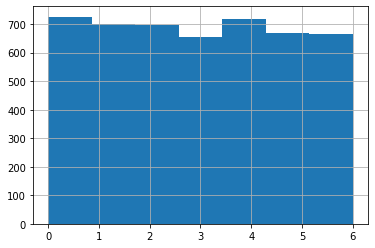

In [17]:
df["crop"].hist(bins = 7)

Заметен слабый разброс популярности категориий

In [18]:
df["crop"].value_counts()

0    726
4    718
1    700
2    697
5    668
6    666
3    655
Name: crop, dtype: int64

Посмотрим на разброс площади полей

<AxesSubplot:xlabel='area', ylabel='count'>

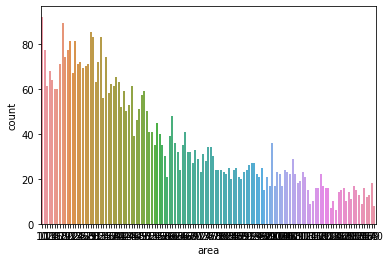

In [19]:
sns.countplot(x = "area" , data  = df)  

Постараемся найти закономерность

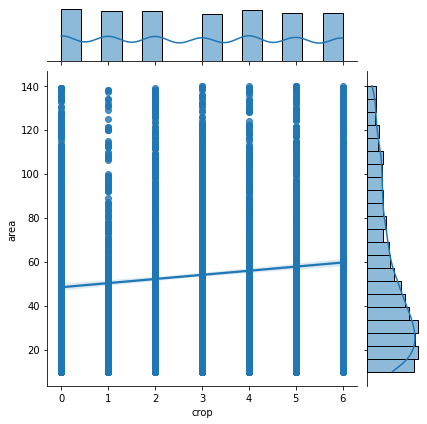

In [20]:
sns.jointplot(x = "crop", y = 'area', data = df, kind = 'reg')

Кажется нет четкой зависимости между категорией культуры и площадью территроии

Последняя попытка найти явную зависимость в данных

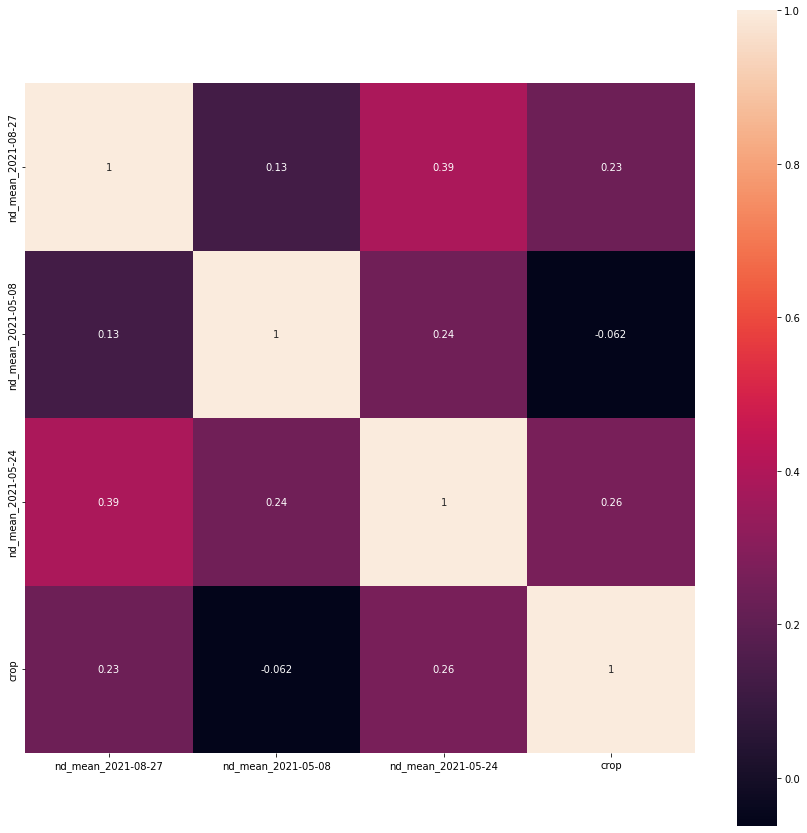

In [21]:
plt.rcParams['figure.figsize']=(15,15)

corr = df.loc[:, "nd_mean_2021-08-27":"crop"].corr()
g = sns.heatmap(corr, square = True, annot=True)

## Выделим выборки

In [22]:
X = df.drop(["id",".geo", "crop"], axis = 1)
y = df[["crop"]]

In [23]:
X.head()

,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,nd_mean_2021-05-16,...,nd_mean_2021-05-19,nd_mean_2021-05-20,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24
0,20,0.072846,0.261778,0.062981,0.104442,0.021096,0.052202,0.158723,0.000000,0.484102,...,0.425571,0.108999,0.118854,0.000000,0.000000,0.026784,0.126832,0.614770,0.008857,0.081498
1,45,0.332928,0.287182,0.097138,0.152467,0.075484,0.000000,0.140326,0.163340,0.519456,...,0.248935,0.134469,0.208268,0.000000,0.000000,0.111148,0.174914,0.179612,0.113071,0.046997
2,28,0.013679,0.007055,0.120804,0.037839,0.259125,0.000000,0.037446,0.506516,0.000000,...,0.127633,0.084467,0.000000,0.210496,0.130467,0.155225,0.090607,0.054127,0.007437,0.219614
3,19,0.105976,0.052500,0.001917,0.011531,0.042316,0.000000,0.000000,0.043604,0.510271,...,0.527583,0.000000,0.642226,0.132886,0.000000,0.570928,0.073492,0.378900,0.327677,0.586523
4,33,0.130885,0.063492,0.024416,0.000000,0.150671,0.046717,0.254284,0.101479,0.000000,...,0.000000,0.206158,0.099058,0.152003,0.073357,0.147842,0.157676,0.012048,0.054223,0.017539


## Обучение модели

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
clf = RandomForestClassifier(random_state=0, n_estimators = 3)

In [26]:
clf.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(n_estimators=3, random_state=0)

## Оценка точности

In [27]:
from sklearn.metrics import recall_score, precision_score

pred = clf.predict(X_test)
print(clf,'\n',recall_score(y_test, pred, average="macro", zero_division=0))

RandomForestClassifier(n_estimators=3, random_state=0) 
 0.8433458287066015


In [28]:
clf_test = RandomForestClassifier(random_state=0, n_estimators = 3)

In [29]:
clf_test.fit(X, y)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(n_estimators=3, random_state=0)

In [30]:
X_test = df_test.drop(["id",".geo"], axis = 1)

In [31]:
pred_test = clf_test.predict(X_test)

In [32]:
pred_test

array([3, 2, 3, ..., 2, 6, 4])

In [33]:
df_test['id']

0        611
1       6417
2       3352
3       4224
4       3102
        ... 
2066    1743
2067    3968
2068    3809
2069    5485
2070    5899
Name: id, Length: 2071, dtype: int64

In [34]:
#Сохраняем в csv файл
pd.DataFrame({'id': df_test['id'],
                'crop': np.squeeze(pred_test.astype(int))}).to_csv(
                OUT_DIR + 'agro_baseline.csv', sep=',', index=None)

# CatBoostClassifier

In [32]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier, Pool

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, r2_score, precision_score

# TODO: наверно всё же лучше в pipeline
def cat_boost_clf(df_train_, df_test_, save_file_prefix='catboost_solution', num_iter_=1000):
    X_ = df_train_.drop(["id",".geo", "crop"], axis = 1)
    y_ = df_train_[["crop"]]

    #Разделение на train/test для локального тестирования
    X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.20, random_state=1)

    #Создание объекта данных Pool, плюсы: возможность указать какие признаки являются категориальными
    pool_train_ = Pool(X_train_, y_train_)
    pool_test_ = Pool(X_test_)

    #Объявление CatBoostClassifer и обучение
    # Увеличиваем количество итераций
    model_ = CatBoostClassifier(task_type='GPU', num_boost_round=num_iter_)
    model_.fit(pool_train_, logging_level='Silent')

    #Получение ответов модели на тестовой выборке в локальном тестировании 
    y_pred_ = model_.predict(pool_test_)

    #model_.save_model(f'/kaggle/working/{save_file_prefix}_cat_boost_frac.cbm', format='cbm')

    #Сохраняем в csv файл
    pd.DataFrame({'id': X_test_.index, 'crop': np.squeeze(y_pred_.astype(int))}).to_csv(
        f'/kaggle/working/{save_file_prefix}_catboost_frac_out.csv', sep=',', index=None)

    #На локальном тестировании модель выдаёт такой результат
    result_ = recall_score(y_test_, y_pred_, average='macro', zero_division=True)

    print("Recall score",result_)

    #Формируем sample_solution. В обучении используется весь train, ответы получаем на test
    pool_train_solution_ = Pool(X_, y_)
    pool_test_solution_ = Pool(df_test_.drop(["id",".geo"], axis = 1))

    # Увеличиваем количество итераций
    model_solution_ = CatBoostClassifier(task_type='GPU', num_boost_round=num_iter_)
    model_solution_.fit(pool_train_solution_, logging_level='Silent')

    #model_solution_.save_model(f'/kaggle/working/{save_file_prefix}_cat_boost_full.cbm', format='cbm')


    #Получение ответов
    y_pred_solution_ = model_solution_.predict(pool_test_solution_)


    #Вот так они выглядят
    y_pred_solution_.astype(int)


    #Сохраняем в csv файл
    pd.DataFrame({'id': df_test_.id,
                  'crop': np.squeeze(y_pred_solution_.astype(int))}).to_csv(
                    f'/kaggle/working/{save_file_prefix}_catboost_full_out.csv', sep=',', index=None)


In [36]:
cat_boost_clf(df, df_test, 'agro_1', 1000)

Recall score 0.9494695360993763


# XGBoostClassifier

In [33]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, r2_score, precision_score

def xg_boost_clf(df_train_, df_test_, save_file_prefix='xgb_solution'):
    X_ = df_train_.drop(["id",".geo", "crop"], axis = 1)
    y_ = df_train_[["crop"]]

    #Разделение на train/test для локального тестирования
    X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.20, random_state=1)

    # Объявление модели
    model_ = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', tree_method='gpu_hist')
    #model_ = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', tree_method='gpu_hist',
    #                              predictor='gpu_predictor', sampling_method='gradient_based',
    #                             n_estimators=1000, max_depth=16, subsample=0.8, max_bin=8096)

    model_.fit(X_train_, y_train_)

    #Получение ответов модели на тестовой выборке в локальном тестировании 
    y_pred_ = model_.predict(X_test_)

    #model_.save_model(f'/kaggle/working/{save_file_prefix}_xgboost_frac.cbm', format='cbm')

    X_test_.index
    #Сохраняем в csv файл
    pd.DataFrame({'id': X_test_.index, 'crop': np.squeeze(y_pred_.astype(int))}).to_csv(
        f'/kaggle/working/{save_file_prefix}_xgboost_frac_out.csv', sep=',', index=None)

    #На локальном тестировании модель выдаёт такой результат
    result_ = recall_score(y_test_, y_pred_, average='macro', zero_division=True)

    print("Recall score",result_)


    #model_xgb_all = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', tree_method='gpu_hist',
    #                          n_estimators=800, predictor='gpu_predictor', max_depth=16, subsample=0.8,
    #                          learning_rate=0.3, sampling_method='gradient_based', max_bin=8096)

    model_xgb_all = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', tree_method='gpu_hist',
                                  predictor='gpu_predictor', sampling_method='gradient_based',
                                 n_estimators=1000, max_depth=16, subsample=0.8, max_bin=8096)

    #Формируем solution. В обучении используется весь train, ответы получаем на test
    model_xgb_all.fit(X_, y_)
    
    #model_xgb_all.save_model(f'/kaggle/working/{save_file_prefix}_xg_boost_full.cbm', format='cbm')

    #Получение ответов
    y_xgb_pred_all = model_xgb_all.predict(df_test_.drop(["id",".geo"], axis = 1))


    #Вот так они выглядят
    y_xgb_pred_all.astype(int)


    #Сохраняем в csv файл
    pd.DataFrame({'id': df_test_.id,
                  'crop': np.squeeze(y_xgb_pred_all.astype(int))}).to_csv(
                    f'/kaggle/working/{save_file_prefix}_xgboost_full_out.csv', sep=',', index=None)

In [38]:
xg_boost_clf(df, df_test, 'agro_2')

Recall score 0.9513091020008165


# LightGBM

In [34]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import lightgbm as ltb

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, r2_score, precision_score

def lgbm_clf(df_train_, df_test_, save_file_prefix='lgbm_solution'):
    X_ = df_train_.drop(["id",".geo", "crop"], axis = 1)
    y_ = df_train_[["crop"]]


    #Разделение на train/test для локального тестирования
    X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.20, random_state=1)
    
    # Обучение на части данных для оценки точности модели
    model_frac = ltb.LGBMClassifier()
    
    model_frac.fit(X_train_, y_train_)
    y_pred_frac = model_frac.predict(X_test_)
    
    #На локальном тестировании модель выдаёт такой результат
    result_frac = recall_score(y_test_, y_pred_frac, average='macro', zero_division=True)

    print("Recall score",result_frac)
    
    # Обучение на всех данных для предсказания на отправку
    model = ltb.LGBMClassifier()
    model.fit(X_, y_)
    
    y_pred_all = model.predict(df_test_.drop(['id', '.geo'], axis=1))
    
    #Сохраняем в csv файл
    pd.DataFrame({'id': df_test_.id,
                  'crop': np.squeeze(y_pred_all.astype(int))}).to_csv(
                    f'/kaggle/working/{save_file_prefix}_lgbm_full_out.csv', sep=',', index=None)

In [40]:
lgbm_clf(df, df_test, 'agro_3')

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall score 0.9515739886293396


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# LightAutoML

In [52]:
X = df.drop(["id",".geo", "crop"], axis = 1)
y = df[["crop"]]

#Разделение на train/test для локального тестирования
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [53]:
get_ipython().system('pip install -U lightautoml')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.3/319.3 kB 1.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.7/215.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.1/804.1 MB 844.3 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.3/531.3 kB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 34.5 MB/s eta 0:00:0000:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.7/84.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.2/121.2 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [54]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

In [55]:
automl = TabularAutoML(task = Task('multiclass', metric = 'crossentropy'))
oof_pred = automl.fit_predict(df,  roles = {'target': 'crop', 'drop': ['id', '.geo']}, verbose = 2)
test_pred = automl.predict(df_test.drop(['id', '.geo'], axis=1))

[11:07:46] Stdout logging level is INFO2.
[11:07:46] Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer
[11:07:46] Task: multiclass

[11:07:46] Start automl preset with listed constraints:
[11:07:46] - time: 3600.00 seconds
[11:07:46] - CPU: 4 cores
[11:07:46] - memory: 16 GB

[11:07:46] Train data shape: (4830, 74)

[11:07:52] Layer 1 train process start. Time left 3593.54 secs
[11:07:52] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[11:07:52] ===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[11:07:54] ===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[11:07:56] ===== Start working with fold 2 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[11:07:57] ===== Start working with fold 3 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[11:07:59] ===== Start working with fold 4 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[11:08:00] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -0.16754409627161476
[11:08:00] Lvl_0_Pipe_

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  valid_sets = [valid_sets]
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  # start training


[11:08:37] Selector_LightGBM fitting and predicting completed
[11:08:37] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
[11:08:37] ===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
[11:09:07] ===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
[11:09:26] ===== Start working with fold 2 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
[11:09:54] ===== Start working with fold 3 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
[11:10:21] ===== Start working with fold 4 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
[11:10:42] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -0.11170449673676479
[11:10:42] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed
[11:10:42] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 300.00 secs


/opt/conda/lib/python3.7/site-packages/lightautoml/ml_algo/tuning/optuna.py:232: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  name=parameter, **SearchSpace.params
/opt/conda/lib/python3.7/site-packages/lightautoml/ml_algo/tuning/optuna.py:232: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  name=parameter, **SearchSpace.params
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  valid_sets = [valid_sets]
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.p

[11:15:50] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed
[11:15:50] The set of hyperparameters {'feature_fraction': 0.6872700594236812, 'num_leaves': 244, 'bagging_fraction': 0.8659969709057025, 'min_sum_hessian_in_leaf': 0.24810409748678125, 'reg_alpha': 2.5361081166471375e-07, 'reg_lambda': 2.5348407664333426e-07}
 achieve -0.0909 crossentropy
[11:15:50] Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...
[11:15:50] ===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  valid_sets = [valid_sets]
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  # start training


[11:16:01] ===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====
[11:16:10] ===== Start working with fold 2 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====
[11:16:20] ===== Start working with fold 3 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====
[11:16:31] ===== Start working with fold 4 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====
[11:16:41] Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = -0.10153941953930207
[11:16:41] Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed
[11:16:41] Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...
[11:16:41] ===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_2_CatBoost =====
[11:16:58] ===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_2_CatBoost =====
[11:17:14] ===== Start working with fold 2 for Lvl_0_Pipe_1_Mod_2_CatBoost =====
[11:17:29] ===== Start working with fold 3 for Lvl_0_Pipe_1_Mod_2_CatBoost =====
[11:17:42] ===== Start working with fold 4 for Lvl_0_Pipe_1_Mod_2_CatBoost =====
[11:17:55] Fitting L

/opt/conda/lib/python3.7/site-packages/lightautoml/ml_algo/tuning/optuna.py:232: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  name=parameter, **SearchSpace.params
/opt/conda/lib/python3.7/site-packages/lightautoml/ml_algo/tuning/optuna.py:232: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  name=parameter, **SearchSpace.params
/opt/conda/lib/python3.7/site-packages/lightautoml/ml_algo/tuning/optuna.py:232: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  name=parameter, **Searc

[11:22:58] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed
[11:22:58] The set of hyperparameters {'max_depth': 5, 'l2_leaf_reg': 0.1165691561324743, 'min_data_in_leaf': 4}
 achieve -0.1098 crossentropy
[11:22:58] Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...
[11:22:58] ===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====
[11:23:18] ===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====
[11:23:36] ===== Start working with fold 2 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====
[11:23:56] ===== Start working with fold 3 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====
[11:24:13] ===== Start working with fold 4 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====
[11:24:31] Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = -0.10962226943628071
[11:24:31] Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed
[11:24:31] Time left 2594.49 secs

[11:24:31] Layer 1 training completed.

[11:24:31] Layer 2 train p

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  valid_sets = [valid_sets]
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  # start training


[11:25:08] ===== Start working with fold 1 for Lvl_1_Pipe_1_Mod_0_LightGBM =====
[11:25:27] ===== Start working with fold 2 for Lvl_1_Pipe_1_Mod_0_LightGBM =====
[11:25:54] ===== Start working with fold 3 for Lvl_1_Pipe_1_Mod_0_LightGBM =====
[11:26:21] ===== Start working with fold 4 for Lvl_1_Pipe_1_Mod_0_LightGBM =====
[11:26:42] Fitting Lvl_1_Pipe_1_Mod_0_LightGBM finished. score = -0.11170449673676479
[11:26:42] Lvl_1_Pipe_1_Mod_0_LightGBM fitting and predicting completed
[11:26:42] Time left 2463.50 secs

[11:26:42] Layer 2 training completed.

[11:26:42] Blending: optimization starts with equal weights and score -0.11156821537944146
[11:26:42] Blending: iteration 0: score = -0.11089963514746187, weights = [0.25974083 0.7402592 ]
[11:26:42] Blending: iteration 1: score = -0.11089963514746187, weights = [0.25974083 0.7402592 ]
[11:26:42] Blending: no score update. Terminated

[11:26:42] Automl preset training completed in 1136.59 seconds

[11:26:42] Model description:
Models on le

In [56]:
# 
#result = recall_score(df['crop'], test_pred, average='macro', zero_division=True)

#print("Recall score",result)

In [57]:
test_pred.data.shape

(2071, 7)

In [58]:
test_pred.data[:,2]

array([2.7423821e-04, 5.4038042e-05, 2.0234476e-04, ..., 2.2103517e-04,
       4.1312107e-04, 5.5071185e-03], dtype=float32)

In [59]:
print(automl.create_model_str_desc())

Models on level 0:
	 5 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2
	 5 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM
	 5 averaged models Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM
	 5 averaged models Lvl_0_Pipe_1_Mod_2_CatBoost
	 5 averaged models Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost

Final prediction for new objects (level 1) = 
	 0.25974 * (5 averaged models Lvl_1_Pipe_0_Mod_0_LinearL2) +
	 0.74026 * (5 averaged models Lvl_1_Pipe_1_Mod_0_LightGBM) 


<AxesSubplot:xlabel='Feature'>

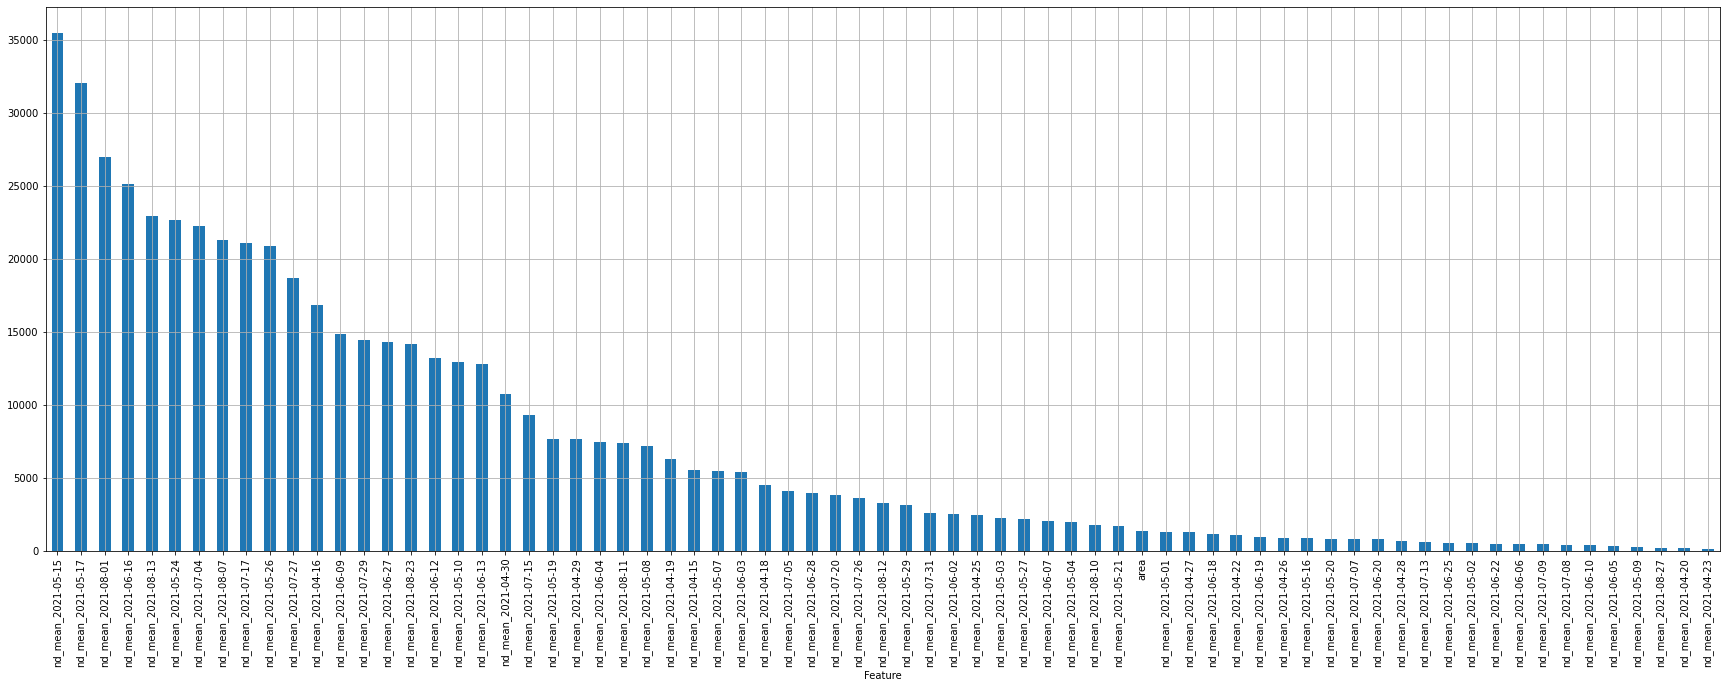

In [60]:
fast_fi = automl.get_feature_scores('fast')
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True)

In [61]:
pd.DataFrame(test_pred.data)

,0,1,2,3,4,5,6
0,0.001830,0.000053,0.000274,0.000098,0.000259,0.000137,0.997349
1,0.000955,0.001455,0.000054,0.995785,0.000080,0.001565,0.000106
2,0.000734,0.001545,0.000202,0.000114,0.000478,0.000394,0.996533
3,0.000046,0.000275,0.999297,0.000061,0.000031,0.000165,0.000124
4,0.001089,0.000798,0.003425,0.000355,0.007812,0.985744,0.000776
...,...,...,...,...,...,...,...
2066,0.000217,0.000224,0.000119,0.000094,0.998195,0.001068,0.000082
2067,0.000386,0.000427,0.000260,0.000117,0.000464,0.000577,0.997769
2068,0.000943,0.002148,0.000221,0.993799,0.000281,0.002402,0.000206
2069,0.017869,0.011799,0.000413,0.006888,0.000306,0.962206,0.000519


In [62]:
test_pred_class = pd.DataFrame(test_pred.data).idxmax(axis=1).astype(int)
test_pred_class

0       6
1       3
2       6
3       2
4       5
       ..
2066    4
2067    6
2068    3
2069    5
2070    5
Length: 2071, dtype: int64

In [63]:
pd.DataFrame({'id': df_test.id,
              'crop': test_pred_class}).to_csv(
    '/kaggle/working/light_auto_ml_solution.csv', sep=',', index=None)

In [66]:
import joblib

joblib.dump(automl, '/kaggle/working/automl.pkl')

#automl=joblib.load('model.pkl')

['/kaggle/working/automl.pkl']

# LightAutoML для данных с замененными 0 на значение ближайшего соседа слева

In [70]:
automl_nozero = TabularAutoML(task = Task('multiclass', metric = 'crossentropy'))
oof_pred_nozero = automl.fit_predict(df_nozero,  roles = {'target': 'crop', 'drop': ['id', '.geo']}, verbose = 2)
test_pred_nozero = automl.predict(df_test_nozero.drop(['id', '.geo'], axis=1))

[11:46:22] Stdout logging level is INFO2.
[11:46:22] Task: multiclass

[11:46:22] Start automl preset with listed constraints:
[11:46:22] - time: 3600.00 seconds
[11:46:22] - CPU: 4 cores
[11:46:22] - memory: 16 GB

[11:46:22] Train data shape: (4830, 74)

[11:46:27] Layer 1 train process start. Time left 3594.52 secs
[11:46:27] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[11:46:27] ===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[11:46:29] ===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[11:46:31] ===== Start working with fold 2 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[11:46:33] ===== Start working with fold 3 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[11:46:34] ===== Start working with fold 4 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[11:46:36] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = -0.16754409627161476
[11:46:36] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed
[11:46:36] Time left 3586.24 secs



/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  valid_sets = [valid_sets]
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  # start training


[11:47:13] Selector_LightGBM fitting and predicting completed
[11:47:13] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
[11:47:13] ===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
[11:47:42] ===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
[11:48:00] ===== Start working with fold 2 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
[11:48:28] ===== Start working with fold 3 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
[11:48:55] ===== Start working with fold 4 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
[11:49:17] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = -0.11170449673676479
[11:49:17] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed
[11:49:17] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 300.00 secs


/opt/conda/lib/python3.7/site-packages/lightautoml/ml_algo/tuning/optuna.py:232: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  name=parameter, **SearchSpace.params
/opt/conda/lib/python3.7/site-packages/lightautoml/ml_algo/tuning/optuna.py:232: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  name=parameter, **SearchSpace.params
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  valid_sets = [valid_sets]
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.p

[11:55:05] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed
[11:55:05] The set of hyperparameters {'feature_fraction': 0.6872700594236812, 'num_leaves': 244, 'bagging_fraction': 0.8659969709057025, 'min_sum_hessian_in_leaf': 0.24810409748678125, 'reg_alpha': 2.5361081166471375e-07, 'reg_lambda': 2.5348407664333426e-07}
 achieve -0.0909 crossentropy
[11:55:05] Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...
[11:55:05] ===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====


/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  valid_sets = [valid_sets]
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  # start training


[11:55:14] ===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====
[11:55:24] ===== Start working with fold 2 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====
[11:55:34] ===== Start working with fold 3 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====
[11:55:43] ===== Start working with fold 4 for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM =====
[11:55:53] Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = -0.10153941953930207
[11:55:53] Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed
[11:55:54] Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...
[11:55:54] ===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_2_CatBoost =====
[11:56:10] ===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_2_CatBoost =====
[11:56:27] ===== Start working with fold 2 for Lvl_0_Pipe_1_Mod_2_CatBoost =====
[11:56:41] ===== Start working with fold 3 for Lvl_0_Pipe_1_Mod_2_CatBoost =====
[11:56:53] ===== Start working with fold 4 for Lvl_0_Pipe_1_Mod_2_CatBoost =====
[11:57:08] Fitting L

/opt/conda/lib/python3.7/site-packages/lightautoml/ml_algo/tuning/optuna.py:232: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  name=parameter, **SearchSpace.params
/opt/conda/lib/python3.7/site-packages/lightautoml/ml_algo/tuning/optuna.py:232: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  name=parameter, **SearchSpace.params
/opt/conda/lib/python3.7/site-packages/lightautoml/ml_algo/tuning/optuna.py:232: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  name=parameter, **Searc

[12:02:10] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed
[12:02:10] The set of hyperparameters {'max_depth': 5, 'l2_leaf_reg': 0.1165691561324743, 'min_data_in_leaf': 4}
 achieve -0.1098 crossentropy
[12:02:10] Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...
[12:02:10] ===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====
[12:02:30] ===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====
[12:02:49] ===== Start working with fold 2 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====
[12:03:08] ===== Start working with fold 3 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====
[12:03:26] ===== Start working with fold 4 for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost =====
[12:03:42] Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = -0.10962226943628071
[12:03:42] Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed
[12:03:42] Time left 2559.43 secs

[12:03:42] Layer 1 training completed.

[12:03:42] Layer 2 train p

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  valid_sets = [valid_sets]
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  # start training


[12:04:20] ===== Start working with fold 1 for Lvl_1_Pipe_1_Mod_0_LightGBM =====
[12:04:38] ===== Start working with fold 2 for Lvl_1_Pipe_1_Mod_0_LightGBM =====
[12:05:06] ===== Start working with fold 3 for Lvl_1_Pipe_1_Mod_0_LightGBM =====
[12:05:33] ===== Start working with fold 4 for Lvl_1_Pipe_1_Mod_0_LightGBM =====
[12:05:55] Fitting Lvl_1_Pipe_1_Mod_0_LightGBM finished. score = -0.11170449673676479
[12:05:55] Lvl_1_Pipe_1_Mod_0_LightGBM fitting and predicting completed
[12:05:55] Time left 2427.23 secs

[12:05:55] Layer 2 training completed.

[12:05:55] Blending: optimization starts with equal weights and score -0.11156821537944146
[12:05:55] Blending: iteration 0: score = -0.11089963514746187, weights = [0.25974083 0.7402592 ]
[12:05:55] Blending: iteration 1: score = -0.11089963514746187, weights = [0.25974083 0.7402592 ]
[12:05:55] Blending: no score update. Terminated

[12:05:55] Automl preset training completed in 1172.86 seconds

[12:05:55] Model description:
Models on le

In [71]:
test_pred_nozero.data.shape

(2071, 7)

In [72]:
test_pred_nozero.data[:,2]

array([2.7423821e-04, 5.4038042e-05, 2.0234476e-04, ..., 2.2103517e-04,
       4.1312107e-04, 5.5071185e-03], dtype=float32)

In [73]:
print(automl_nozero.create_model_str_desc())

AttributeError: 'TabularAutoML' object has no attribute 'levels'

In [74]:
fast_fi_nozero = automl_nozero.get_feature_scores('fast')
fast_fi_nozero.set_index('Feature')['Importance'].plot.bar(figsize = (30, 10), grid = True)

AttributeError: 'TabularAutoML' object has no attribute 'levels'

In [75]:
pd.DataFrame(test_pred_nozero.data)

,0,1,2,3,4,5,6
0,0.001830,0.000053,0.000274,0.000098,0.000259,0.000137,0.997349
1,0.000955,0.001455,0.000054,0.995785,0.000080,0.001565,0.000106
2,0.000734,0.001545,0.000202,0.000114,0.000478,0.000394,0.996533
3,0.000046,0.000275,0.999297,0.000061,0.000031,0.000165,0.000124
4,0.001089,0.000798,0.003425,0.000355,0.007812,0.985744,0.000776
...,...,...,...,...,...,...,...
2066,0.000217,0.000224,0.000119,0.000094,0.998195,0.001068,0.000082
2067,0.000386,0.000427,0.000260,0.000117,0.000464,0.000577,0.997769
2068,0.000943,0.002148,0.000221,0.993799,0.000281,0.002402,0.000206
2069,0.017869,0.011799,0.000413,0.006888,0.000306,0.962206,0.000519


In [76]:
test_pred_nozero_class = pd.DataFrame(test_pred.data).idxmax(axis=1).astype(int)
test_pred_nozero_class

0       6
1       3
2       6
3       2
4       5
       ..
2066    4
2067    6
2068    3
2069    5
2070    5
Length: 2071, dtype: int64

In [83]:
pd.DataFrame({'id': df_test_nozero.id,
              'crop': test_pred_nozero_class}).to_csv(
    '/kaggle/working/light_auto_ml_nozero_solution2.csv', sep=',', index=None)

In [84]:
import joblib

joblib.dump(automl_nozero, '/kaggle/working/automl_nozero2.pkl')

['/kaggle/working/automl_nozero2.pkl']

# Замена нулевых значений на соседние

In [35]:
# Последовательности нулей остаются, но их мало
# Можно использовать для оценки улучшения результата
def impute_zeros(df_in):
    df_proc = df_in.loc[:, ~df_in.columns.isin(['id', 'area', '.geo', 'crop'])]
    rows, cols = df_proc.shape
    print(rows, cols)

    # TODO: может можно как-то векторизовать или через lambda function?
    for row in range(rows):
        for col in range(cols):
            # Заменяем пропущенное значение на предыдущее
            if df_proc.iloc[row, col] == 0:
                df_proc.iloc[row, col] = df_proc.iloc[row, col-1]
    
    # для первого столбца заменяем нулевые на значения из следующего столбца
    for row in range(rows):
        if df_proc.iloc[row, 0] == 0:
            df_proc.iloc[row, 0] = df_proc.iloc[row, 1]
    
    return df_in

In [36]:
df_nozero = df.copy()#.drop(["id",".geo", "crop"], axis = 1)
df_test_nozero = df_test.copy()#.drop(['id', '.geo'], axis=1)

In [12]:
df_nozero.loc[:, ~df_nozero.columns.isin(['id', 'area', '.geo', 'crop'])].shape

(4830, 70)

In [37]:
df_nozero = impute_zeros(df_nozero)

4830 70


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [14]:
df_nozero

,id,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,...,nd_mean_2021-05-20,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24,crop
0,3536,20,0.072846,0.261778,0.062981,0.104442,0.021096,0.052202,0.158723,0.000000,...,0.108999,0.118854,0.000000,0.000000,0.026784,0.126832,0.614770,0.008857,0.081498,3
1,3739,45,0.332928,0.287182,0.097138,0.152467,0.075484,0.000000,0.140326,0.163340,...,0.134469,0.208268,0.000000,0.000000,0.111148,0.174914,0.179612,0.113071,0.046997,4
2,1294,28,0.013679,0.007055,0.120804,0.037839,0.259125,0.000000,0.037446,0.506516,...,0.084467,0.000000,0.210496,0.130467,0.155225,0.090607,0.054127,0.007437,0.219614,2
3,2859,19,0.105976,0.052500,0.001917,0.011531,0.042316,0.000000,0.000000,0.043604,...,0.000000,0.642226,0.132886,0.000000,0.570928,0.073492,0.378900,0.327677,0.586523,5
4,3685,33,0.130885,0.063492,0.024416,0.000000,0.150671,0.046717,0.254284,0.101479,...,0.206158,0.099058,0.152003,0.073357,0.147842,0.157676,0.012048,0.054223,0.017539,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,3772,74,0.028770,0.038282,0.255329,0.148166,0.225421,0.479483,0.071684,0.016856,...,0.001875,0.031995,0.066882,0.139222,0.009041,0.042483,0.022464,0.017705,0.148440,6
4826,5191,109,0.035939,0.030722,0.033869,0.029646,0.318387,0.247905,0.265180,0.286298,...,0.192014,0.255964,0.131357,0.000000,0.187236,0.055721,0.044182,0.048316,0.041440,6
4827,5226,58,0.191255,0.063581,0.140111,0.323984,0.000000,0.005056,0.092693,0.399439,...,0.085006,0.187352,0.142930,0.000000,0.047572,0.007225,0.145505,0.051215,0.079730,6
4828,5390,14,0.291399,0.221428,0.007247,0.055074,0.057781,0.187749,0.112403,0.183555,...,0.536825,0.644357,0.085861,0.631304,0.694524,0.031836,0.453151,0.000000,0.006495,5


In [38]:
df_test_nozero = impute_zeros(df_test_nozero)

2071 70


In [39]:
(df_test_nozero==0).sum()

id                      0
area                    0
nd_mean_2021-04-16    240
nd_mean_2021-04-19    326
nd_mean_2021-04-22    209
                     ... 
nd_mean_2021-07-05    366
nd_mean_2021-08-13    367
nd_mean_2021-08-27    350
nd_mean_2021-05-08    324
nd_mean_2021-05-24    397
Length: 73, dtype: int64

In [17]:
df_nozero

,id,area,nd_mean_2021-04-16,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-05-02,nd_mean_2021-05-04,nd_mean_2021-05-07,...,nd_mean_2021-05-20,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24,crop
0,3536,20,0.072846,0.261778,0.062981,0.104442,0.021096,0.052202,0.158723,0.000000,...,0.108999,0.118854,0.000000,0.000000,0.026784,0.126832,0.614770,0.008857,0.081498,3
1,3739,45,0.332928,0.287182,0.097138,0.152467,0.075484,0.000000,0.140326,0.163340,...,0.134469,0.208268,0.000000,0.000000,0.111148,0.174914,0.179612,0.113071,0.046997,4
2,1294,28,0.013679,0.007055,0.120804,0.037839,0.259125,0.000000,0.037446,0.506516,...,0.084467,0.000000,0.210496,0.130467,0.155225,0.090607,0.054127,0.007437,0.219614,2
3,2859,19,0.105976,0.052500,0.001917,0.011531,0.042316,0.000000,0.000000,0.043604,...,0.000000,0.642226,0.132886,0.000000,0.570928,0.073492,0.378900,0.327677,0.586523,5
4,3685,33,0.130885,0.063492,0.024416,0.000000,0.150671,0.046717,0.254284,0.101479,...,0.206158,0.099058,0.152003,0.073357,0.147842,0.157676,0.012048,0.054223,0.017539,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,3772,74,0.028770,0.038282,0.255329,0.148166,0.225421,0.479483,0.071684,0.016856,...,0.001875,0.031995,0.066882,0.139222,0.009041,0.042483,0.022464,0.017705,0.148440,6
4826,5191,109,0.035939,0.030722,0.033869,0.029646,0.318387,0.247905,0.265180,0.286298,...,0.192014,0.255964,0.131357,0.000000,0.187236,0.055721,0.044182,0.048316,0.041440,6
4827,5226,58,0.191255,0.063581,0.140111,0.323984,0.000000,0.005056,0.092693,0.399439,...,0.085006,0.187352,0.142930,0.000000,0.047572,0.007225,0.145505,0.051215,0.079730,6
4828,5390,14,0.291399,0.221428,0.007247,0.055074,0.057781,0.187749,0.112403,0.183555,...,0.536825,0.644357,0.085861,0.631304,0.694524,0.031836,0.453151,0.000000,0.006495,5


In [49]:
cat_boost_clf(df_nozero, df_test_nozero, 'agro_1_nonzero', 1000)

Recall score 0.9494695360993763


In [50]:
xg_boost_clf(df_nozero, df_test_nozero, 'agro_2_nonzero')

Recall score 0.9513091020008165


In [51]:
lgbm_clf(df_nozero, df_test_nozero, 'agro_3_nonzero')

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall score 0.9515739886293396


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Замена эктремумов и пропусков на линейную интерполяцию. Прогон тех же алгоритмов.

In [45]:
df_train_proc = pd.read_csv(PROC_DIR + 'df_train_proc.linterp.1.csv')
df_train_proc

,id,.geo,crop,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-17,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-21,...,nd_mean_2021-08-18,nd_mean_2021-08-19,nd_mean_2021-08-20,nd_mean_2021-08-21,nd_mean_2021-08-22,nd_mean_2021-08-23,nd_mean_2021-08-24,nd_mean_2021-08-25,nd_mean_2021-08-26,nd_mean_2021-08-27
0,3536,"{""type"":""Polygon"",""coordinates"":[[[42.49107269...",3,0.187150,0.072846,0.167573,0.262300,0.261778,0.063134,0.063057,...,0.080845,0.071647,0.062450,0.053253,0.044055,0.034858,0.179836,0.324814,0.469792,0.614770
1,3739,"{""type"":""Polygon"",""coordinates"":[[[50.25545110...",4,0.245285,0.332928,0.341030,0.349133,0.287182,0.064671,0.080904,...,0.176592,0.176927,0.177263,0.177598,0.177934,0.178270,0.178605,0.178941,0.179276,0.179612
2,1294,"{""type"":""Polygon"",""coordinates"":[[[37.99698998...",2,0.006391,0.013679,0.011471,0.009263,0.007055,0.044971,0.082887,...,0.077579,0.074973,0.072367,0.069762,0.067156,0.064550,0.061945,0.059339,0.056733,0.054127
3,2859,"{""type"":""Polygon"",""coordinates"":[[[44.72154181...",5,0.293425,0.105976,0.212011,0.318047,0.052500,0.153700,0.077808,...,0.067634,0.066462,0.065291,0.064119,0.062948,0.061776,0.141057,0.220338,0.299619,0.378900
4,3685,"{""type"":""Polygon"",""coordinates"":[[[34.77829934...",4,0.027983,0.130885,0.124056,0.117227,0.063492,0.040565,0.032490,...,0.089964,0.076421,0.062879,0.049336,0.035794,0.022251,0.019700,0.017150,0.014599,0.012048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,3772,"{""type"":""Polygon"",""coordinates"":[[[40.90052911...",6,0.066154,0.028770,0.031941,0.035112,0.038282,0.110631,0.182980,...,0.080692,0.088334,0.095976,0.103618,0.111260,0.118901,0.094792,0.070683,0.046573,0.022464
4826,5191,"{""type"":""Polygon"",""coordinates"":[[[40.00883381...",6,0.243867,0.035939,0.024671,0.013403,0.030722,0.246513,0.140191,...,0.056833,0.057055,0.057278,0.057500,0.057723,0.057945,0.054504,0.051063,0.047622,0.044182
4827,5226,"{""type"":""Polygon"",""coordinates"":[[[38.57789936...",6,0.090026,0.191255,0.105576,0.019897,0.063581,0.089091,0.114601,...,0.338296,0.404510,0.470724,0.536939,0.603153,0.669367,0.538402,0.407436,0.276471,0.145505
4828,5390,"{""type"":""Polygon"",""coordinates"":[[[53.31082730...",5,0.301663,0.291399,0.293244,0.295089,0.221428,0.326494,0.166871,...,0.182306,0.212400,0.242494,0.272588,0.302682,0.332776,0.362869,0.392963,0.423057,0.453151


In [46]:
df_test_proc = pd.read_csv(PROC_DIR + 'df_test_proc.linterp.1.csv')
df_test_proc

,id,.geo,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-17,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-21,nd_mean_2021-04-22,...,nd_mean_2021-08-18,nd_mean_2021-08-19,nd_mean_2021-08-20,nd_mean_2021-08-21,nd_mean_2021-08-22,nd_mean_2021-08-23,nd_mean_2021-08-24,nd_mean_2021-08-25,nd_mean_2021-08-26,nd_mean_2021-08-27
0,611,"{""type"":""Polygon"",""coordinates"":[[[35.96545926...",0.083038,0.196691,0.220759,0.244827,0.243023,0.241219,0.250261,0.259303,...,0.389661,0.324735,0.259808,0.194882,0.129956,0.065030,0.069821,0.074613,0.079405,0.084197
1,6417,"{""type"":""Polygon"",""coordinates"":[[[39.50520518...",0.122470,0.091192,0.166097,0.241003,0.211301,0.181600,0.153711,0.125823,...,0.144065,0.140163,0.136261,0.132359,0.128456,0.124554,0.120652,0.116750,0.112847,0.108945
2,3352,"{""type"":""Polygon"",""coordinates"":[[[39.30105409...",0.259347,0.272061,0.284775,0.297489,0.033368,0.117264,0.201160,0.285057,...,0.080853,0.089455,0.098058,0.106661,0.115264,0.123867,0.132470,0.141073,0.149676,0.158279
3,4224,"{""type"":""Polygon"",""coordinates"":[[[33.08144648...",0.166209,0.111243,0.141166,0.171089,0.201012,0.083885,0.060934,0.037984,...,0.320968,0.363364,0.405760,0.448155,0.490551,0.532947,0.459145,0.385344,0.311543,0.237742
4,3102,"{""type"":""Polygon"",""coordinates"":[[[45.10231339...",0.010862,0.029734,0.048606,0.067479,0.234954,0.213059,0.191163,0.169268,...,0.349682,0.409894,0.470106,0.530318,0.590530,0.650742,0.518380,0.386019,0.253657,0.121296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,1743,"{""type"":""Polygon"",""coordinates"":[[[38.68082436...",0.225092,0.212900,0.200708,0.188515,0.017866,0.099791,0.156175,0.212560,...,0.222629,0.251595,0.280560,0.309525,0.338491,0.367456,0.303813,0.240171,0.176528,0.112885
2067,3968,"{""type"":""Polygon"",""coordinates"":[[[56.32489418...",0.288768,0.010670,0.147323,0.283976,0.105135,0.308051,0.239447,0.170843,...,0.362426,0.320375,0.278325,0.236274,0.194223,0.152172,0.241991,0.331810,0.421628,0.511447
2068,3809,"{""type"":""Polygon"",""coordinates"":[[[37.89523772...",0.131978,0.131978,0.107483,0.082987,0.058492,0.241415,0.424339,0.607262,...,0.094072,0.111189,0.128305,0.145422,0.162539,0.179656,0.153932,0.128208,0.102484,0.076760
2069,5485,"{""type"":""Polygon"",""coordinates"":[[[38.98573772...",0.044726,0.044726,0.039618,0.034510,0.093328,0.126618,0.157688,0.188758,...,0.043491,0.044103,0.044714,0.045326,0.045937,0.046549,0.044371,0.042193,0.040015,0.037837


In [47]:
cat_boost_clf(df_train_proc, df_test_proc, 'agro_1_linterp_1', 1000)

KeyboardInterrupt: 

In [25]:
xg_boost_clf(df_train_proc, df_test_proc, 'agro_2_linterp_1')

Recall score 0.9184887208924105


In [26]:
lgbm_clf(df_train_proc, df_test_proc, 'agro_3_linterp_1')

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall score 0.9205834794746778


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
ts_cols_init = list(df.columns[df.columns.str.contains('nd_mean')])
ts_cols_init[:5]

['nd_mean_2021-04-16',
 'nd_mean_2021-04-19',
 'nd_mean_2021-04-22',
 'nd_mean_2021-04-26',
 'nd_mean_2021-04-28']

In [49]:
ts_cols_linp_1 = list(df_train_proc.columns[df_train_proc.columns.str.contains('nd_mean')])
ts_cols_linp_1[:5]

['nd_mean_2021-04-15',
 'nd_mean_2021-04-16',
 'nd_mean_2021-04-17',
 'nd_mean_2021-04-18',
 'nd_mean_2021-04-19']

In [50]:
ts_cols_diff = list(set(ts_cols_linp_1) - set(ts_cols_init))
ts_cols_diff[:5]

['nd_mean_2021-05-14',
 'nd_mean_2021-05-06',
 'nd_mean_2021-05-11',
 'nd_mean_2021-07-02',
 'nd_mean_2021-08-03']

In [32]:
df_train_proc.loc[:, ~df_train_proc.columns.isin(ts_cols_diff)].shape

(4830, 73)

In [22]:
# Повтор для усечённых данных
cat_boost_clf(df_train_proc.loc[:, ~df_train_proc.columns.isin(ts_cols_diff)],
              df_test_proc.loc[:, ~df_test_proc.columns.isin(ts_cols_diff)],
              'agro_1_linterp_2', 1000)

NameError: name 'df_train_proc' is not defined

In [23]:
xg_boost_clf(df_train_proc.loc[:, ~df_train_proc.columns.isin(ts_cols_diff)],
             df_test_proc.loc[:, ~df_test_proc.columns.isin(ts_cols_diff)],
             'agro_2_linterp_2')

NameError: name 'df_train_proc' is not defined

In [24]:
lgbm_clf(df_train_proc.loc[:, ~df_train_proc.columns.isin(ts_cols_diff)],
         df_test_proc.loc[:, ~df_test_proc.columns.isin(ts_cols_diff)],
         'agro_3_linterp_2')

NameError: name 'df_train_proc' is not defined

# Reduced feature set by AutoML Feature Importance

In [64]:
fi_date_list = [
                '05-15', '05-17', '08-01', '06-16', '08-13', '05-24', '07-04', '08-07', '07-17', '05-26', '07-27', '04-16',
                '06-09', '07-29', '06-27', '08-23', '06-12', '05-10', '06-13', '04-30', '07-15', '05-19', '04-29', '06-04',
                '08-11', '05-08', '04-19', '04-15', '05-07', '06-03', '04-18',
                '07-05', '06-28', '07-20', '07-26', '08-12', '05-29', '07-31', '06-02', '04-25', '05-03', '05-27', '06-07', '05-04', '08-10', '05-21',
                '05-01', '04-27', '06-18', '04-22', '06-19', '04-26', '05-16', '05-20', # fi_8
                '07-07', # fi_9
                '06-20', #fi_10
                #'04-28', #fi_11 видимо то же, что и fi_7 # fi_7
                #'07-13', 
                #'06-25', '05-02', '06-22', '06-06', '07-09', # fi_5
                #'07-08', '06-10', '06-05', '05-09', '08-27', '04-20', '04-23', # fi_6
               ]

In [65]:
fi_date_list = ['nd_mean_2021-' + dt for dt in fi_date_list]
fi_date_list[:5]

['nd_mean_2021-05-15',
 'nd_mean_2021-05-17',
 'nd_mean_2021-08-01',
 'nd_mean_2021-06-16',
 'nd_mean_2021-08-13']

In [66]:
fi_date_list_diff = list(set(ts_cols_linp_1) - set(fi_date_list))
fi_date_list_diff[:5]

['nd_mean_2021-05-06',
 'nd_mean_2021-06-15',
 'nd_mean_2021-07-10',
 'nd_mean_2021-07-09',
 'nd_mean_2021-07-01']

In [67]:
len(ts_cols_linp_1)

135

In [40]:
len(fi_date_list)

57

In [41]:
len(fi_date_list_diff)

78

In [42]:
len(fi_date_list_diff)

78

In [43]:
df_train_proc.loc[:, ~df_train_proc.columns.isin(fi_date_list_diff)]

,id,.geo,crop,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-22,nd_mean_2021-04-25,nd_mean_2021-04-26,...,nd_mean_2021-07-27,nd_mean_2021-07-29,nd_mean_2021-07-31,nd_mean_2021-08-01,nd_mean_2021-08-07,nd_mean_2021-08-10,nd_mean_2021-08-11,nd_mean_2021-08-12,nd_mean_2021-08-13,nd_mean_2021-08-23
0,3536,"{""type"":""Polygon"",""coordinates"":[[[42.49107269...",3,0.187150,0.072846,0.262300,0.261778,0.062981,0.077577,0.104442,...,0.112933,0.727516,0.745745,0.754859,0.272208,0.030883,0.344449,0.658016,0.126832,0.034858
1,3739,"{""type"":""Polygon"",""coordinates"":[[[50.25545110...",4,0.245285,0.332928,0.349133,0.287182,0.097138,0.173578,0.152467,...,0.073804,0.666918,0.089721,0.706226,0.184231,0.062582,0.618475,0.601685,0.174914,0.178270
2,1294,"{""type"":""Polygon"",""coordinates"":[[[37.99698998...",2,0.006391,0.013679,0.009263,0.007055,0.120804,0.041751,0.037839,...,0.119380,0.321827,0.411168,0.403472,0.357296,0.045370,0.172080,0.131344,0.090607,0.064550
3,2859,"{""type"":""Polygon"",""coordinates"":[[[44.72154181...",5,0.293425,0.105976,0.318047,0.052500,0.001917,0.072589,0.011531,...,0.242224,0.149104,0.055983,0.152193,0.060656,0.352723,0.379196,0.327025,0.073492,0.061776
4,3685,"{""type"":""Polygon"",""coordinates"":[[[34.77829934...",4,0.027983,0.130885,0.117227,0.063492,0.024416,0.109385,0.065578,...,0.761576,0.833694,0.611108,0.772962,0.311382,0.080592,0.067906,0.055220,0.157676,0.022251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,3772,"{""type"":""Polygon"",""coordinates"":[[[40.90052911...",6,0.066154,0.028770,0.035112,0.038282,0.255329,0.241602,0.148166,...,0.623504,0.683847,0.379482,0.700605,0.645532,0.205700,0.059090,0.631144,0.042483,0.118901
4826,5191,"{""type"":""Polygon"",""coordinates"":[[[40.00883381...",6,0.243867,0.035939,0.013403,0.030722,0.033869,0.022246,0.029646,...,0.752198,0.792938,0.800815,0.634428,0.783913,0.093728,0.435314,0.776900,0.055721,0.057945
4827,5226,"{""type"":""Polygon"",""coordinates"":[[[38.57789936...",6,0.090026,0.191255,0.019897,0.063581,0.140111,0.218746,0.323984,...,0.642035,0.627561,0.740523,0.781434,0.783490,0.006700,0.132444,0.069834,0.007225,0.669367
4828,5390,"{""type"":""Polygon"",""coordinates"":[[[53.31082730...",5,0.301663,0.291399,0.295089,0.221428,0.007247,0.039012,0.055074,...,0.005442,0.133080,0.235802,0.213491,0.079623,0.049245,0.506127,0.528256,0.031836,0.332776


In [33]:
# Повтор для усечённых по LightAutoML feature importance данных
cat_boost_clf(df_train_proc.loc[:, ~df_train_proc.columns.isin(fi_date_list_diff)],
              df_test_proc.loc[:, ~df_test_proc.columns.isin(fi_date_list_diff)],
              'agro_1_linterp_fi_3', 1000)

NameError: name 'fi_date_list_diff' is not defined

In [34]:
xg_boost_clf(df_train_proc.loc[:, ~df_train_proc.columns.isin(fi_date_list_diff)],
             df_test_proc.loc[:, ~df_test_proc.columns.isin(fi_date_list_diff)],
             'agro_2_linterp_fi_3')

NameError: name 'fi_date_list_diff' is not defined

In [35]:
lgbm_clf(df_train_proc.loc[:, ~df_train_proc.columns.isin(fi_date_list_diff)],
         df_test_proc.loc[:, ~df_test_proc.columns.isin(fi_date_list_diff)],
         'agro_3_linterp_fi_3')

NameError: name 'fi_date_list_diff' is not defined

In [44]:
# Повтор для усечённых no zero data по LightAutoML feature importance данных
cat_boost_clf(df_nozero.loc[:, ~df_nozero.columns.isin(fi_date_list_diff)],
              df_test_nozero.loc[:, ~df_test_nozero.columns.isin(fi_date_list_diff)],
              'agro_1_nozero_fi_3', 1000)

Recall score 0.9535264919562102


In [45]:
xg_boost_clf(df_nozero.loc[:, ~df_nozero.columns.isin(fi_date_list_diff)],
             df_test_nozero.loc[:, ~df_test_nozero.columns.isin(fi_date_list_diff)],
             'agro_2_nozero_fi_3')

Recall score 0.9505573744355368


In [46]:
lgbm_clf(df_nozero.loc[:, ~df_nozero.columns.isin(fi_date_list_diff)],
         df_test_nozero.loc[:, ~df_test_nozero.columns.isin(fi_date_list_diff)],
         'agro_3_nozero_fi_3')

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall score 0.9504536512593331


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
lgbm_clf(df_nozero.loc[:, ~df_nozero.columns.isin(fi_date_list_diff)],
         df_test_nozero.loc[:, ~df_test_nozero.columns.isin(fi_date_list_diff)],
         'agro_3_nozero_fi_4')

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall score 0.9488845773050363


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
lgbm_clf(df_nozero.loc[:, ~df_nozero.columns.isin(fi_date_list_diff)],
         df_test_nozero.loc[:, ~df_test_nozero.columns.isin(fi_date_list_diff)],
         'agro_3_nozero_fi_5')

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall score 0.952550039719358


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
lgbm_clf(df_nozero.loc[:, ~df_nozero.columns.isin(fi_date_list_diff)],
         df_test_nozero.loc[:, ~df_test_nozero.columns.isin(fi_date_list_diff)],
         'agro_3_nozero_fi_6')

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall score 0.952550039719358


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
# На prod fi_7 дало то же, что и рекордные fi_3
lgbm_clf(df_nozero.loc[:, ~df_nozero.columns.isin(fi_date_list_diff)],
         df_test_nozero.loc[:, ~df_test_nozero.columns.isin(fi_date_list_diff)],
         'agro_3_nozero_fi_7')

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall score 0.9504536512593331


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
# fi_8 дало меньше рекордных fi_3
lgbm_clf(df_nozero.loc[:, ~df_nozero.columns.isin(fi_date_list_diff)],
         df_test_nozero.loc[:, ~df_test_nozero.columns.isin(fi_date_list_diff)],
         'agro_3_nozero_fi_8')

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall score 0.95226787477167


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
# fi_9 рекорд
lgbm_clf(df_nozero.loc[:, ~df_nozero.columns.isin(fi_date_list_diff)],
         df_test_nozero.loc[:, ~df_test_nozero.columns.isin(fi_date_list_diff)],
         'agro_3_nozero_fi_9')

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall score 0.9528985113067676


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
# fi_10 снова рекорд > fi_9
lgbm_clf(df_nozero.loc[:, ~df_nozero.columns.isin(fi_date_list_diff)],
         df_test_nozero.loc[:, ~df_test_nozero.columns.isin(fi_date_list_diff)],
         'agro_3_nozero_fi_10_2')

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall score 0.9535578408107677


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
# fi_11 уже меньше и fi_10 и многих остальных, идентичено fi_7
lgbm_clf(df_nozero.loc[:, ~df_nozero.columns.isin(fi_date_list_diff)],
         df_test_nozero.loc[:, ~df_test_nozero.columns.isin(fi_date_list_diff)],
         'agro_3_nozero_fi_11')

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall score 0.9504536512593331


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
# Пробуем присоединить интегральную сумму к окружению с лучшими результатами
df_train_sum = pd.read_csv(SUM_DIR + 'train_full_ts_sum_normalized.csv')
df_train_sum.columns = ['sum_normalized']
df_train_sum

,sum_normalized
0,0.278410
1,0.298644
2,0.260012
3,0.272894
4,0.274916
...,...
4825,0.300698
4826,0.359206
4827,0.333270
4828,0.303476


In [57]:
df_test_sum = pd.read_csv(SUM_DIR + 'test_full_ts_sum_normalized.csv')
df_test_sum.columns = ['sum_normalized']
df_test_sum

,sum_normalized
0,0.331405
1,0.310062
2,0.300965
3,0.331044
4,0.293758
...,...
2066,0.292690
2067,0.330529
2068,0.284559
2069,0.334562


In [59]:
lgbm_clf(pd.concat([df_nozero.loc[:, ~df_nozero.columns.isin(fi_date_list_diff)], df_train_sum['sum_normalized']], axis=1),
         pd.concat([df_test_nozero.loc[:, ~df_test_nozero.columns.isin(fi_date_list_diff)], df_test_sum['sum_normalized']], axis=1),
         'agro_3_nozero_fi_12')

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall score 0.9473321833887336


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
cat_boost_clf(pd.concat([df_nozero.loc[:, ~df_nozero.columns.isin(fi_date_list_diff)], df_train_sum['sum_normalized']], axis=1),
         pd.concat([df_test_nozero.loc[:, ~df_test_nozero.columns.isin(fi_date_list_diff)], df_test_sum['sum_normalized']], axis=1),
         'agro_1_nozero_fi_12')

Recall score 0.9487929282762112


In [61]:
xg_boost_clf(pd.concat([df_nozero.loc[:, ~df_nozero.columns.isin(fi_date_list_diff)], df_train_sum['sum_normalized']], axis=1),
         pd.concat([df_test_nozero.loc[:, ~df_test_nozero.columns.isin(fi_date_list_diff)], df_test_sum['sum_normalized']], axis=1),
         'agro_2_nozero_fi_12')

Recall score 0.9468577032685055


In [51]:
ds_cols = df_nozero.columns[df_nozero.columns.str.contains('nd_mean')]
ds_cols

Index(['nd_mean_2021-04-16', 'nd_mean_2021-04-19', 'nd_mean_2021-04-22',
       'nd_mean_2021-04-26', 'nd_mean_2021-04-28', 'nd_mean_2021-05-02',
       'nd_mean_2021-05-04', 'nd_mean_2021-05-07', 'nd_mean_2021-05-16',
       'nd_mean_2021-05-17', 'nd_mean_2021-05-21', 'nd_mean_2021-05-26',
       'nd_mean_2021-05-27', 'nd_mean_2021-05-29', 'nd_mean_2021-06-06',
       'nd_mean_2021-06-09', 'nd_mean_2021-06-13', 'nd_mean_2021-06-16',
       'nd_mean_2021-06-18', 'nd_mean_2021-06-19', 'nd_mean_2021-06-20',
       'nd_mean_2021-06-22', 'nd_mean_2021-06-25', 'nd_mean_2021-06-27',
       'nd_mean_2021-07-07', 'nd_mean_2021-07-08', 'nd_mean_2021-07-09',
       'nd_mean_2021-07-13', 'nd_mean_2021-07-15', 'nd_mean_2021-07-17',
       'nd_mean_2021-07-20', 'nd_mean_2021-07-26', 'nd_mean_2021-07-27',
       'nd_mean_2021-07-29', 'nd_mean_2021-07-31', 'nd_mean_2021-08-07',
       'nd_mean_2021-08-12', 'nd_mean_2021-04-15', 'nd_mean_2021-04-18',
       'nd_mean_2021-04-25', 'nd_mean_2021-04-27', 

In [54]:
ds_spring_filtered_cols = ds_cols[ds_cols > 'nd_mean_2021-05-04']
ds_spring_filtered_cols

Index(['nd_mean_2021-05-07', 'nd_mean_2021-05-16', 'nd_mean_2021-05-17',
       'nd_mean_2021-05-21', 'nd_mean_2021-05-26', 'nd_mean_2021-05-27',
       'nd_mean_2021-05-29', 'nd_mean_2021-06-06', 'nd_mean_2021-06-09',
       'nd_mean_2021-06-13', 'nd_mean_2021-06-16', 'nd_mean_2021-06-18',
       'nd_mean_2021-06-19', 'nd_mean_2021-06-20', 'nd_mean_2021-06-22',
       'nd_mean_2021-06-25', 'nd_mean_2021-06-27', 'nd_mean_2021-07-07',
       'nd_mean_2021-07-08', 'nd_mean_2021-07-09', 'nd_mean_2021-07-13',
       'nd_mean_2021-07-15', 'nd_mean_2021-07-17', 'nd_mean_2021-07-20',
       'nd_mean_2021-07-26', 'nd_mean_2021-07-27', 'nd_mean_2021-07-29',
       'nd_mean_2021-07-31', 'nd_mean_2021-08-07', 'nd_mean_2021-08-12',
       'nd_mean_2021-06-07', 'nd_mean_2021-06-12', 'nd_mean_2021-06-28',
       'nd_mean_2021-08-01', 'nd_mean_2021-08-11', 'nd_mean_2021-05-10',
       'nd_mean_2021-05-15', 'nd_mean_2021-06-02', 'nd_mean_2021-06-03',
       'nd_mean_2021-07-04', 'nd_mean_2021-08-10', 

In [62]:
spring_filtered_cols_list = list(ds_spring_filtered_cols) + ['id', '.geo'] # + ['crop'] для train
spring_filtered_cols_list[:5]

['nd_mean_2021-05-07',
 'nd_mean_2021-05-16',
 'nd_mean_2021-05-17',
 'nd_mean_2021-05-21',
 'nd_mean_2021-05-26']

In [63]:
df_nozero[spring_filtered_cols_list]

,nd_mean_2021-05-07,nd_mean_2021-05-16,nd_mean_2021-05-17,nd_mean_2021-05-21,nd_mean_2021-05-26,nd_mean_2021-05-27,nd_mean_2021-05-29,nd_mean_2021-06-06,nd_mean_2021-06-09,nd_mean_2021-06-13,...,nd_mean_2021-06-04,nd_mean_2021-06-05,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-08,nd_mean_2021-05-24,id,.geo
0,0.000000,0.484102,0.201013,0.029708,0.397833,0.384805,0.015936,0.007275,0.441994,0.172777,...,0.118854,0.000000,0.000000,0.026784,0.126832,0.614770,0.008857,0.081498,3536,"{""type"":""Polygon"",""coordinates"":[[[42.49107269..."
1,0.163340,0.519456,0.501486,0.047332,0.448796,0.692873,0.628463,0.016747,0.000000,0.059826,...,0.208268,0.000000,0.000000,0.111148,0.174914,0.179612,0.113071,0.046997,3739,"{""type"":""Polygon"",""coordinates"":[[[50.25545110..."
2,0.506516,0.000000,0.561541,0.000000,0.029533,0.245910,0.650065,0.000000,0.516493,0.000000,...,0.000000,0.210496,0.130467,0.155225,0.090607,0.054127,0.007437,0.219614,1294,"{""type"":""Polygon"",""coordinates"":[[[37.99698998..."
3,0.043604,0.510271,0.511552,0.000000,0.524763,0.707093,0.645025,0.753284,0.000000,0.032089,...,0.642226,0.132886,0.000000,0.570928,0.073492,0.378900,0.327677,0.586523,2859,"{""type"":""Polygon"",""coordinates"":[[[44.72154181..."
4,0.101479,0.000000,0.403379,0.243192,0.508976,0.244165,0.085326,0.024853,0.019552,0.174209,...,0.099058,0.152003,0.073357,0.147842,0.157676,0.012048,0.054223,0.017539,3685,"{""type"":""Polygon"",""coordinates"":[[[34.77829934..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,0.016856,0.407955,0.367435,0.053663,0.443624,0.076056,0.364016,0.000000,0.103028,0.031768,...,0.031995,0.066882,0.139222,0.009041,0.042483,0.022464,0.017705,0.148440,3772,"{""type"":""Polygon"",""coordinates"":[[[40.90052911..."
4826,0.286298,0.578936,0.420588,0.128040,0.550418,0.027970,0.544788,0.000000,0.177245,0.162996,...,0.255964,0.131357,0.000000,0.187236,0.055721,0.044182,0.048316,0.041440,5191,"{""type"":""Polygon"",""coordinates"":[[[40.00883381..."
4827,0.399439,0.006256,0.477546,0.073930,0.420832,0.275487,0.603981,0.012133,0.034476,0.032245,...,0.187352,0.142930,0.000000,0.047572,0.007225,0.145505,0.051215,0.079730,5226,"{""type"":""Polygon"",""coordinates"":[[[38.57789936..."
4828,0.183555,0.504538,0.721011,0.249602,0.604159,0.659813,0.105083,0.624509,0.233727,0.160216,...,0.644357,0.085861,0.631304,0.694524,0.031836,0.453151,0.000000,0.006495,5390,"{""type"":""Polygon"",""coordinates"":[[[53.31082730..."


In [64]:
# Из усреднённых по культурам временных рядов до 5 мая болтанки в графиках, попробуем убрать данные до этой датыы
lgbm_clf(df_nozero[spring_filtered_cols_list + ['crop']],
         df_test_nozero[spring_filtered_cols_list],
         'agro_3_spring_filtered_1')


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall score 0.9124844721305326


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
cat_boost_clf(df_nozero[spring_filtered_cols_list + ['crop']],
         df_test_nozero[spring_filtered_cols_list],
         'agro_1_spring_filtered_1')

Recall score 0.913904743449039


In [70]:
xg_boost_clf(df_nozero[spring_filtered_cols_list + ['crop']],
         df_test_nozero[spring_filtered_cols_list],
         'agro_2_spring_filtered_1')

Recall score 0.9071928433714191


# Для сглаженых скользящим средним данных

In [18]:
df_train_roll_full_ts = pd.read_csv(ROLL_TS_DIR + 'train_rol_mean_full_ts.csv')
df_train_roll_full_ts.drop('crop.1', axis=1, inplace=True)
df_train_roll_full_ts

,id,area,.geo,crop,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-17,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,...,nd_mean_2021-08-18,nd_mean_2021-08-19,nd_mean_2021-08-20,nd_mean_2021-08-21,nd_mean_2021-08-22,nd_mean_2021-08-23,nd_mean_2021-08-24,nd_mean_2021-08-25,nd_mean_2021-08-26,nd_mean_2021-08-27
0,3536,20,"{""type"":""Polygon"",""coordinates"":[[[42.49107269...",3,0.216218,0.202887,0.254301,0.305716,0.274480,0.063903,...,0.128718,0.124287,0.119856,0.115425,0.110995,0.106564,0.179220,0.251877,0.324534,0.397191
1,3739,45,"{""type"":""Polygon"",""coordinates"":[[[50.25545110...",4,0.146275,0.139817,0.173358,0.206898,0.185338,0.057592,...,0.111672,0.107849,0.104027,0.100204,0.096382,0.092559,0.140128,0.187698,0.235267,0.282836
2,1294,28,"{""type"":""Polygon"",""coordinates"":[[[37.99698998...",2,0.183063,0.131357,0.183021,0.234686,0.152129,0.081619,...,0.100662,0.097503,0.094343,0.091183,0.088023,0.084863,0.140361,0.195858,0.251355,0.306852
3,2859,19,"{""type"":""Polygon"",""coordinates"":[[[44.72154181...",5,0.143271,0.145867,0.172142,0.198418,0.102557,0.075977,...,0.102942,0.098696,0.094450,0.090204,0.085958,0.081712,0.100327,0.118942,0.137557,0.156172
4,3685,33,"{""type"":""Polygon"",""coordinates"":[[[34.77829934...",4,0.162105,0.132663,0.160385,0.188107,0.094706,0.152976,...,0.098998,0.100697,0.102396,0.104094,0.105793,0.107492,0.132051,0.156611,0.181171,0.205731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,3772,74,"{""type"":""Polygon"",""coordinates"":[[[40.90052911...",6,0.157690,0.076960,0.080142,0.083323,0.045786,0.123773,...,0.082007,0.086942,0.091878,0.096814,0.101750,0.106686,0.093792,0.080898,0.068003,0.055109
4826,5191,109,"{""type"":""Polygon"",""coordinates"":[[[40.00883381...",6,0.132369,0.069739,0.055305,0.040871,0.040347,0.144288,...,0.149255,0.170745,0.192234,0.213724,0.235213,0.256703,0.211067,0.165432,0.119796,0.074160
4827,5226,58,"{""type"":""Polygon"",""coordinates"":[[[38.57789936...",6,0.175427,0.136841,0.113858,0.090875,0.088503,0.193182,...,0.164532,0.190575,0.216618,0.242661,0.268704,0.294747,0.262642,0.230536,0.198431,0.166325
4828,5390,14,"{""type"":""Polygon"",""coordinates"":[[[53.31082730...",5,0.225129,0.186379,0.153851,0.121323,0.089702,0.202049,...,0.226998,0.236980,0.246962,0.256945,0.266927,0.276909,0.253896,0.230882,0.207869,0.184856


In [19]:
df_test_roll_full_ts = pd.read_csv(ROLL_TS_DIR + 'test_rol_mean_full_ts.csv')
df_test_roll_full_ts

,id,area,.geo,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-17,nd_mean_2021-04-18,nd_mean_2021-04-19,nd_mean_2021-04-20,nd_mean_2021-04-21,...,nd_mean_2021-08-18,nd_mean_2021-08-19,nd_mean_2021-08-20,nd_mean_2021-08-21,nd_mean_2021-08-22,nd_mean_2021-08-23,nd_mean_2021-08-24,nd_mean_2021-08-25,nd_mean_2021-08-26,nd_mean_2021-08-27
0,611,26,"{""type"":""Polygon"",""coordinates"":[[[35.96545926...",0.102754,0.143941,0.193428,0.242915,0.227162,0.211409,0.201986,...,0.266863,0.232449,0.198035,0.163620,0.129206,0.094792,0.095237,0.095681,0.096126,0.096571
1,6417,98,"{""type"":""Polygon"",""coordinates"":[[[39.50520518...",0.154952,0.186648,0.223877,0.261106,0.162564,0.180028,0.201711,...,0.204860,0.184784,0.164709,0.144634,0.124559,0.104484,0.107648,0.110812,0.113976,0.117140
2,3352,21,"{""type"":""Polygon"",""coordinates"":[[[39.30105409...",0.157766,0.167797,0.203199,0.238602,0.172176,0.155992,0.166517,...,0.233887,0.229429,0.224972,0.220514,0.216057,0.211599,0.195522,0.179445,0.163368,0.147291
3,4224,18,"{""type"":""Polygon"",""coordinates"":[[[33.08144648...",0.139722,0.126057,0.160161,0.194265,0.170159,0.148952,0.151742,...,0.223892,0.250719,0.277546,0.304373,0.331200,0.358027,0.307662,0.257296,0.206931,0.156565
4,3102,53,"{""type"":""Polygon"",""coordinates"":[[[45.10231339...",0.129039,0.131159,0.145223,0.159287,0.129899,0.134712,0.143377,...,0.231602,0.254626,0.277651,0.300675,0.323700,0.346724,0.292556,0.238388,0.184220,0.130052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,1743,18,"{""type"":""Polygon"",""coordinates"":[[[38.68082436...",0.224014,0.088488,0.146452,0.204415,0.064385,0.194127,0.208140,...,0.270941,0.271033,0.271125,0.271218,0.271310,0.271402,0.284050,0.296697,0.309345,0.321993
2067,3968,56,"{""type"":""Polygon"",""coordinates"":[[[56.32489418...",0.196032,0.092943,0.122516,0.152089,0.061753,0.183273,0.248335,...,0.220135,0.215678,0.211221,0.206764,0.202307,0.197851,0.207934,0.218017,0.228100,0.238183
2068,3809,92,"{""type"":""Polygon"",""coordinates"":[[[37.89523772...",0.172641,0.100069,0.123783,0.147497,0.068705,0.193969,0.244412,...,0.180655,0.181815,0.182976,0.184137,0.185297,0.186458,0.186027,0.185595,0.185164,0.184732
2069,5485,53,"{""type"":""Polygon"",""coordinates"":[[[38.98573772...",0.151282,0.074040,0.093085,0.112130,0.065193,0.234716,0.256903,...,0.144142,0.139323,0.134503,0.129684,0.124865,0.120046,0.135525,0.151004,0.166483,0.181962


In [20]:
lgbm_clf(df_train_roll_full_ts, df_test_roll_full_ts, 'agro_3_rol_mean_full_ts')

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall score 0.3167399664032398


/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
cat_boost_clf(df_train_roll_full_ts, df_test_roll_full_ts, 'agro_1_rol_mean_full_ts')

Recall score 0.32118924868116466


In [22]:
xg_boost_clf(df_train_roll_full_ts, df_test_roll_full_ts, 'agro_2_rol_mean_full_ts')

Recall score 0.2988154517964358
